In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
%matplotlib inline

sns.set()

In [2]:
df = pd.read_csv('data/Speed Dating Data.csv', encoding="ISO-8859-1")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [3]:
df.shape

(8378, 195)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [5]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


__Seperate target from features__

In [6]:
df_X, y = df.drop(['match'], axis=1), df['match']

In [7]:
# Drop columns with more than 35% missing values
# 5446 is ~35% missing values
df_X = df_X.dropna(axis=1,thresh=5446)
df_X.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,NaN,4,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0


In [8]:
df_X.shape

(8378, 123)

In [9]:
df_X = df_X.fillna(df.median())

In [10]:
np.sum(df_X.isnull().sum())

1295

__Df still has NaN values__

In [11]:
null_col = df_X.isnull().sum() > 0
null_col[null_col != 0]

field      True
from       True
zipcode    True
career     True
dtype: bool

__The columns field, from, zipcode, and career have NaN values__

In [12]:
df_X[['field','from','zipcode','career']].head()

,field,from,zipcode,career
0,Law,Chicago,"60,521",lawyer
1,Law,Chicago,"60,521",lawyer
2,Law,Chicago,"60,521",lawyer
3,Law,Chicago,"60,521",lawyer
4,Law,Chicago,"60,521",lawyer


In [13]:
df_X.drop(['field','from','zipcode','career'],axis=1,inplace=True)

In [14]:
np.sum(df_X.isnull().sum())

0

__No more NaN Values remaining__

# Normalize data

In [15]:
X = StandardScaler().fit_transform(df_X)
X

array([[-1.78261324, -1.44975265, -1.00119432, ..., -0.19063332,
        -0.44028263, -0.9326512 ],
       [-1.78261324, -1.44975265, -1.00119432, ..., -0.19063332,
        -0.44028263, -0.9326512 ],
       [-1.78261324, -1.44975265, -1.00119432, ..., -0.19063332,
        -0.44028263, -0.9326512 ],
       ..., 
       [ 1.69210734,  2.37490744,  0.99880711, ..., -1.08638542,
        -1.12223638,  0.88084526],
       [ 1.69210734,  2.37490744,  0.99880711, ..., -1.08638542,
        -1.12223638,  0.88084526],
       [ 1.69210734, -0.17486595,  0.99880711, ..., -1.08638542,
        -1.12223638,  0.88084526]])

# PCA

In [16]:
pca = PCA().fit(X)

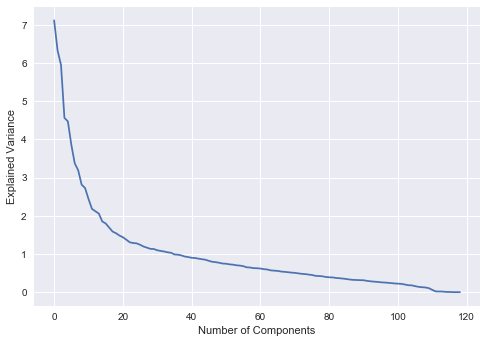

In [17]:
plt.figure()
plt.plot(pca.explained_variance_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

__It appears that most of variability is in the first 50 dimensions__

In [18]:
pca_reduced = PCA(n_components=50).fit_transform(X)
pca_reduced.shape

(8378, 50)

# Split Data into Train/Test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Models

__Random Forest__

In [54]:
rand_forest = RandomForestClassifier(n_estimators=100,oob_score=True)
rf_fit = rand_forest.fit(X_train,y_train)
predict = rf_fit.predict(X_train)
np.sum(predict) / len(predict)

0.16823173643164094

Prediction accuracy is very low